In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('income.csv')

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [5]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [6]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [7]:
df.gender.value_counts()

gender
Male      32650
Female    16192
Name: count, dtype: int64

In [8]:
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df = df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)

In [9]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [10]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,1,0,0,50,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,1,7688,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,0,0,0,30,0,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,0,0,0,40,0,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,1,0,0,20,0,False,True,...,False,False,False,False,False,False,False,True,False,False


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

KeyboardInterrupt: 

<Figure size 1800x1200 with 0 Axes>

In [ ]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [ ]:
correlation = df.corr()['income'].abs()
sorted_correlations = correlation.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [ ]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
48838,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
48839,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
48840,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

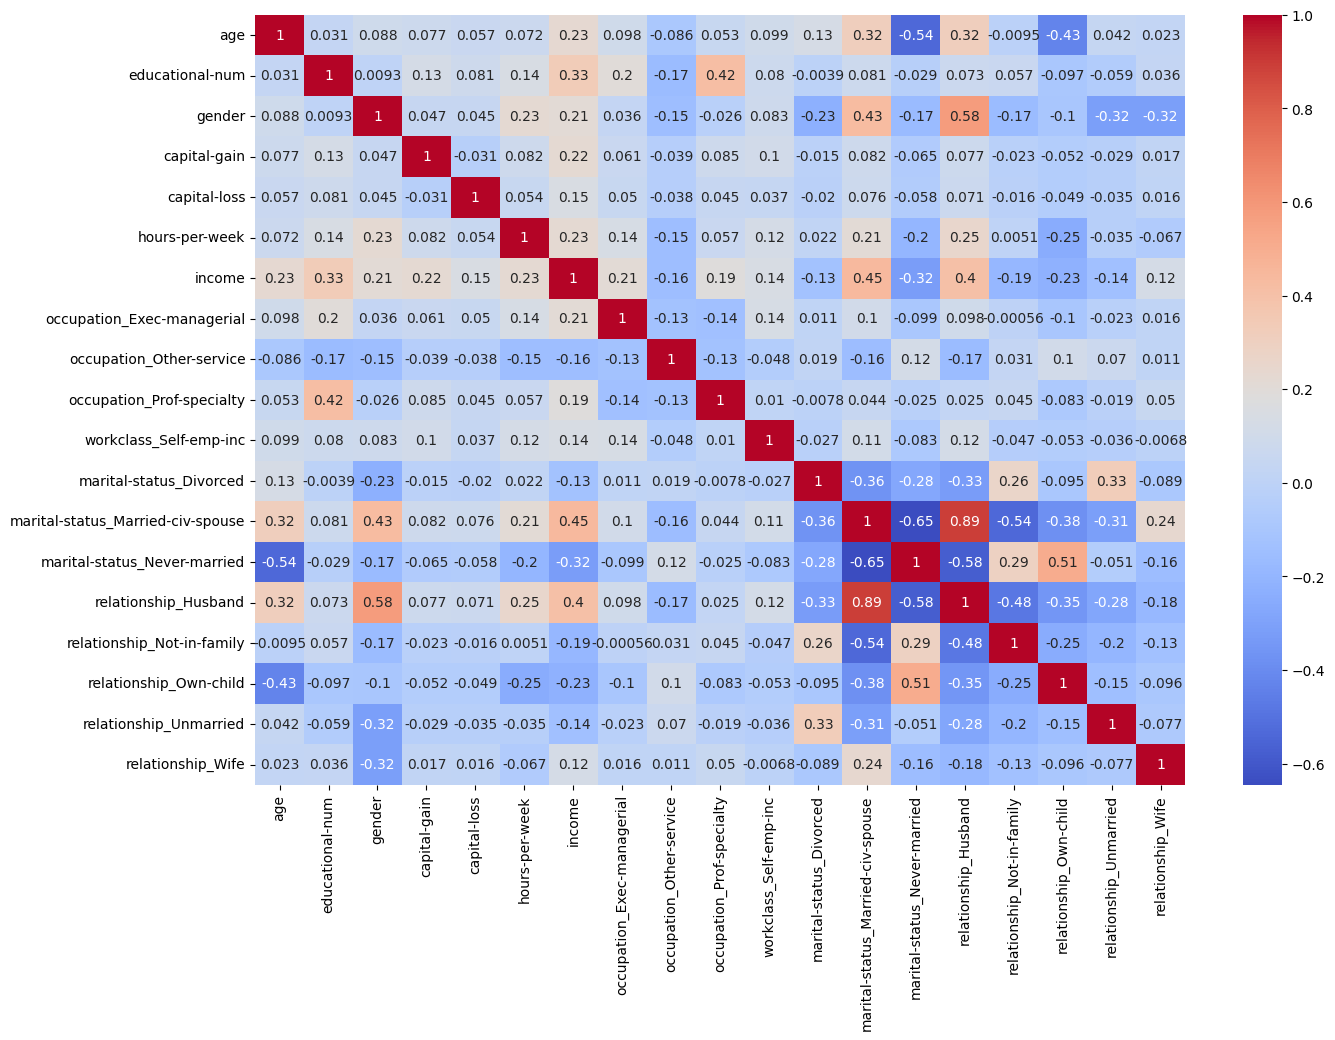

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = df.drop('fnlwgt', axis=1)

train_df, test_df = train_test_split(df, test_size=0.2)

In [ ]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
36007,49,9,1,0,0,30,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
40650,51,4,1,0,0,19,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
45471,26,10,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
35172,36,10,1,0,0,40,0,False,True,False,...,False,False,False,False,False,False,False,True,False,False
27600,19,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21356,36,9,0,7688,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
7547,80,9,1,0,0,15,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
40575,30,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
33882,31,11,1,0,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
43464,32,7,1,0,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
35109,36,13,1,0,0,55,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
5342,18,9,0,0,0,20,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6280,32,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
36881,46,10,1,5178,0,40,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,21,11,1,0,0,50,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
15547,18,8,0,0,0,32,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31273,43,13,1,0,0,40,1,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1747,29,13,0,0,0,55,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
train_X = train_df.drop('income', axis=1)
train_Y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_Y = test_df['income']

In [ ]:
forest = RandomForestClassifier()

forest.fit(train_X, train_Y)

RandomForestClassifier()

In [ ]:
forest.score(test_X, test_Y)

0.8564847988535162

In [ ]:
forest.feature_importances_

array([2.32130377e-01, 1.25500611e-01, 1.29599421e-02, 1.12207522e-01,
       3.65452785e-02, 1.16005565e-01, 1.74008350e-03, 5.06822524e-03,
       6.63886140e-05, 5.94155778e-03, 2.09242821e-02, 4.96177367e-03,
       3.16974269e-03, 4.02355214e-03, 7.91569526e-03, 1.96353860e-04,
       1.87046626e-02, 2.88471059e-03, 6.51112106e-03, 4.67768892e-03,
       4.01645603e-03, 1.72542729e-03, 4.83027622e-03, 5.54763123e-03,
       9.94038914e-07, 9.44608401e-03, 6.09984020e-03, 8.11689053e-03,
       4.38994384e-03, 1.76317467e-04, 7.93170105e-03, 3.49392269e-04,
       6.35161348e-02, 9.56870864e-04, 2.43521272e-02, 2.41685986e-03,
       1.57497375e-03, 4.36751396e-02, 1.37490076e-02, 2.03128186e-03,
       1.18108910e-02, 6.00020237e-03, 1.00914159e-02, 1.36673273e-03,
       3.02147432e-03, 4.91668804e-03, 1.11860850e-03, 6.32778722e-03,
       2.83860189e-03, 3.72663810e-04, 1.34956573e-03, 6.04588156e-04,
       3.18021283e-04, 7.14230902e-04, 2.47890035e-04, 2.05415137e-04,
      

In [ ]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_?', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-mar

In [ ]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [ ]:
importances

{'age': 0.23213037696351782,
 'educational-num': 0.12550061125415535,
 'hours-per-week': 0.11600556465626025,
 'capital-gain': 0.1122075223073984,
 'marital-status_Married-civ-spouse': 0.0635161348490351,
 'relationship_Husband': 0.04367513956795972,
 'capital-loss': 0.03654527851183861,
 'marital-status_Never-married': 0.024352127150458674,
 'occupation_Exec-managerial': 0.020924282130226356,
 'occupation_Prof-specialty': 0.018704662612925013,
 'relationship_Not-in-family': 0.013749007629182925,
 'gender': 0.0129599421214746,
 'relationship_Own-child': 0.011810890986469978,
 'relationship_Wife': 0.010091415932585586,
 'workclass_Private': 0.009446084012176259,
 'workclass_Self-emp-not-inc': 0.00811689053491346,
 'marital-status_Divorced': 0.007931701045554932,
 'occupation_Other-service': 0.007915695255249832,
 'occupation_Sales': 0.006511121063983561,
 'native-country_United-States': 0.006400268386304479,
 'race_White': 0.006327787222034535,
 'workclass_Self-emp-inc': 0.0060998401982

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [50,100,250],
    'max_depth': [5,10,30,None],
    'min_samples_split': [2,4],
    'max_features' : ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, verbose=10)

In [ ]:
grid_search.fit(train_X, train_Y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.835 total time=   0.3s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.3s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.3s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.841 total time=   0.3s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

KeyboardInterrupt: 

In [ ]:
grid_search.best_estimator_